In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, log_loss
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [14]:
df = pd.read_csv('data/train.csv')
df.head()

X1     X2    X3     X4    X5      X6     X7     X8     X9     X10 X11  \
0  3215.0  206.0   8.0  127.0  14.0  5588.0  215.0  248.0  168.0  1057.0  T1   
1  3022.0   18.0   7.0    0.0   0.0  3012.0  215.0  226.0  148.0  1476.0  T1   
2  3008.0   18.0  19.0  382.0  92.0  4715.0  201.0  197.0  127.0  3616.0  T1   
3  2595.0  296.0  24.0   85.0  28.0  1252.0  144.0  224.0  216.0   780.0  T3   
4  3261.0   87.0   4.0   42.0  -2.0  3719.0  226.0  233.0  142.0  3784.0  T1   

   X12    Y  
0  T29  1.0  
1  T23  1.0  
2  T29  1.0  
3  T33  6.0  
4  T38  7.0

In [15]:
print("Before")
print(df.isna().sum())
df.dropna(inplace=True)
print("After")
print(df.isna().sum())

Before
X1     46
X2     40
X3     31
X4     34
X5     40
X6     48
X7     33
X8     33
X9     45
X10    36
X11    38
X12    38
Y      38
dtype: int64
After
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
Y      0
dtype: int64


In [16]:
df = df.astype({'X11': 'category', 'X12': 'category'})
df = df.astype({col : "int64" for col in df.columns if col not in ['X11', 'X12']})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40172 entries, 0 to 40669
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      40172 non-null  int64   
 1   X2      40172 non-null  int64   
 2   X3      40172 non-null  int64   
 3   X4      40172 non-null  int64   
 4   X5      40172 non-null  int64   
 5   X6      40172 non-null  int64   
 6   X7      40172 non-null  int64   
 7   X8      40172 non-null  int64   
 8   X9      40172 non-null  int64   
 9   X10     40172 non-null  int64   
 10  X11     40172 non-null  category
 11  X12     40172 non-null  category
 12  Y       40172 non-null  int64   
dtypes: category(2), int64(11)
memory usage: 3.8 MB


In [17]:
df['Y'].value_counts()

2    19577
1    14648
3     2475
7     1418
6     1206
5      657
4      191
Name: Y, dtype: int64

In [18]:
X = df.drop(['Y'], axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

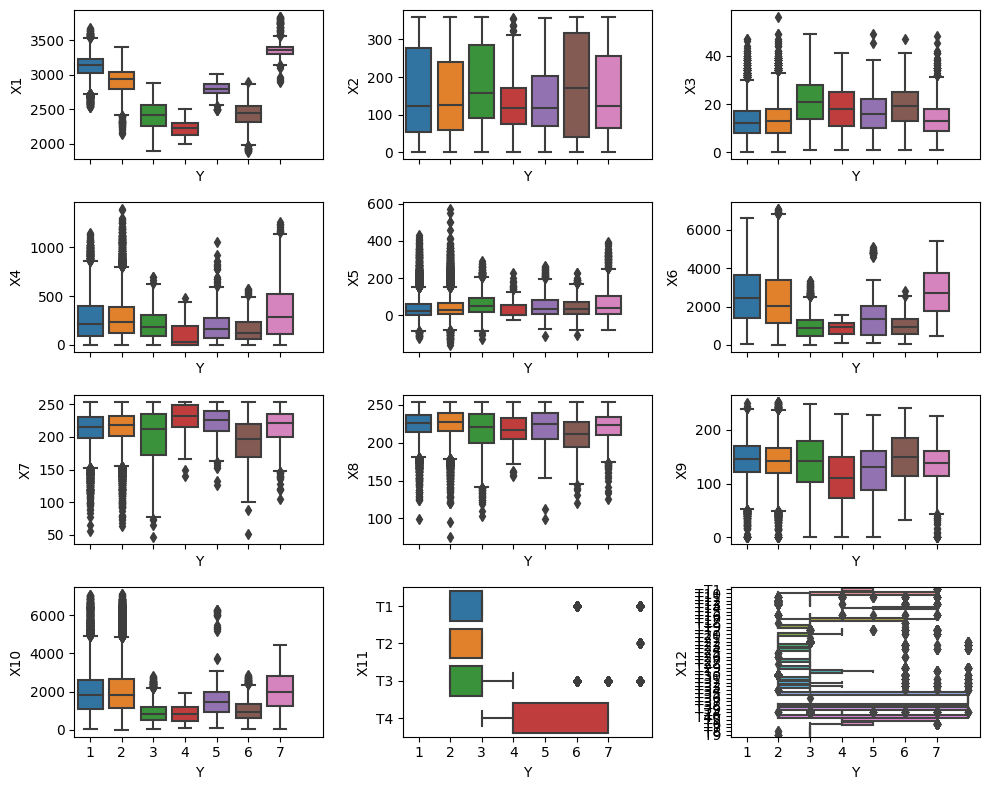

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(10, 8), sharex=True)
for column, axis in zip(X_train.columns, axes.flatten()):
    sns.boxplot(x=y_train, y=X_train[column], ax=axis)
fig.tight_layout()

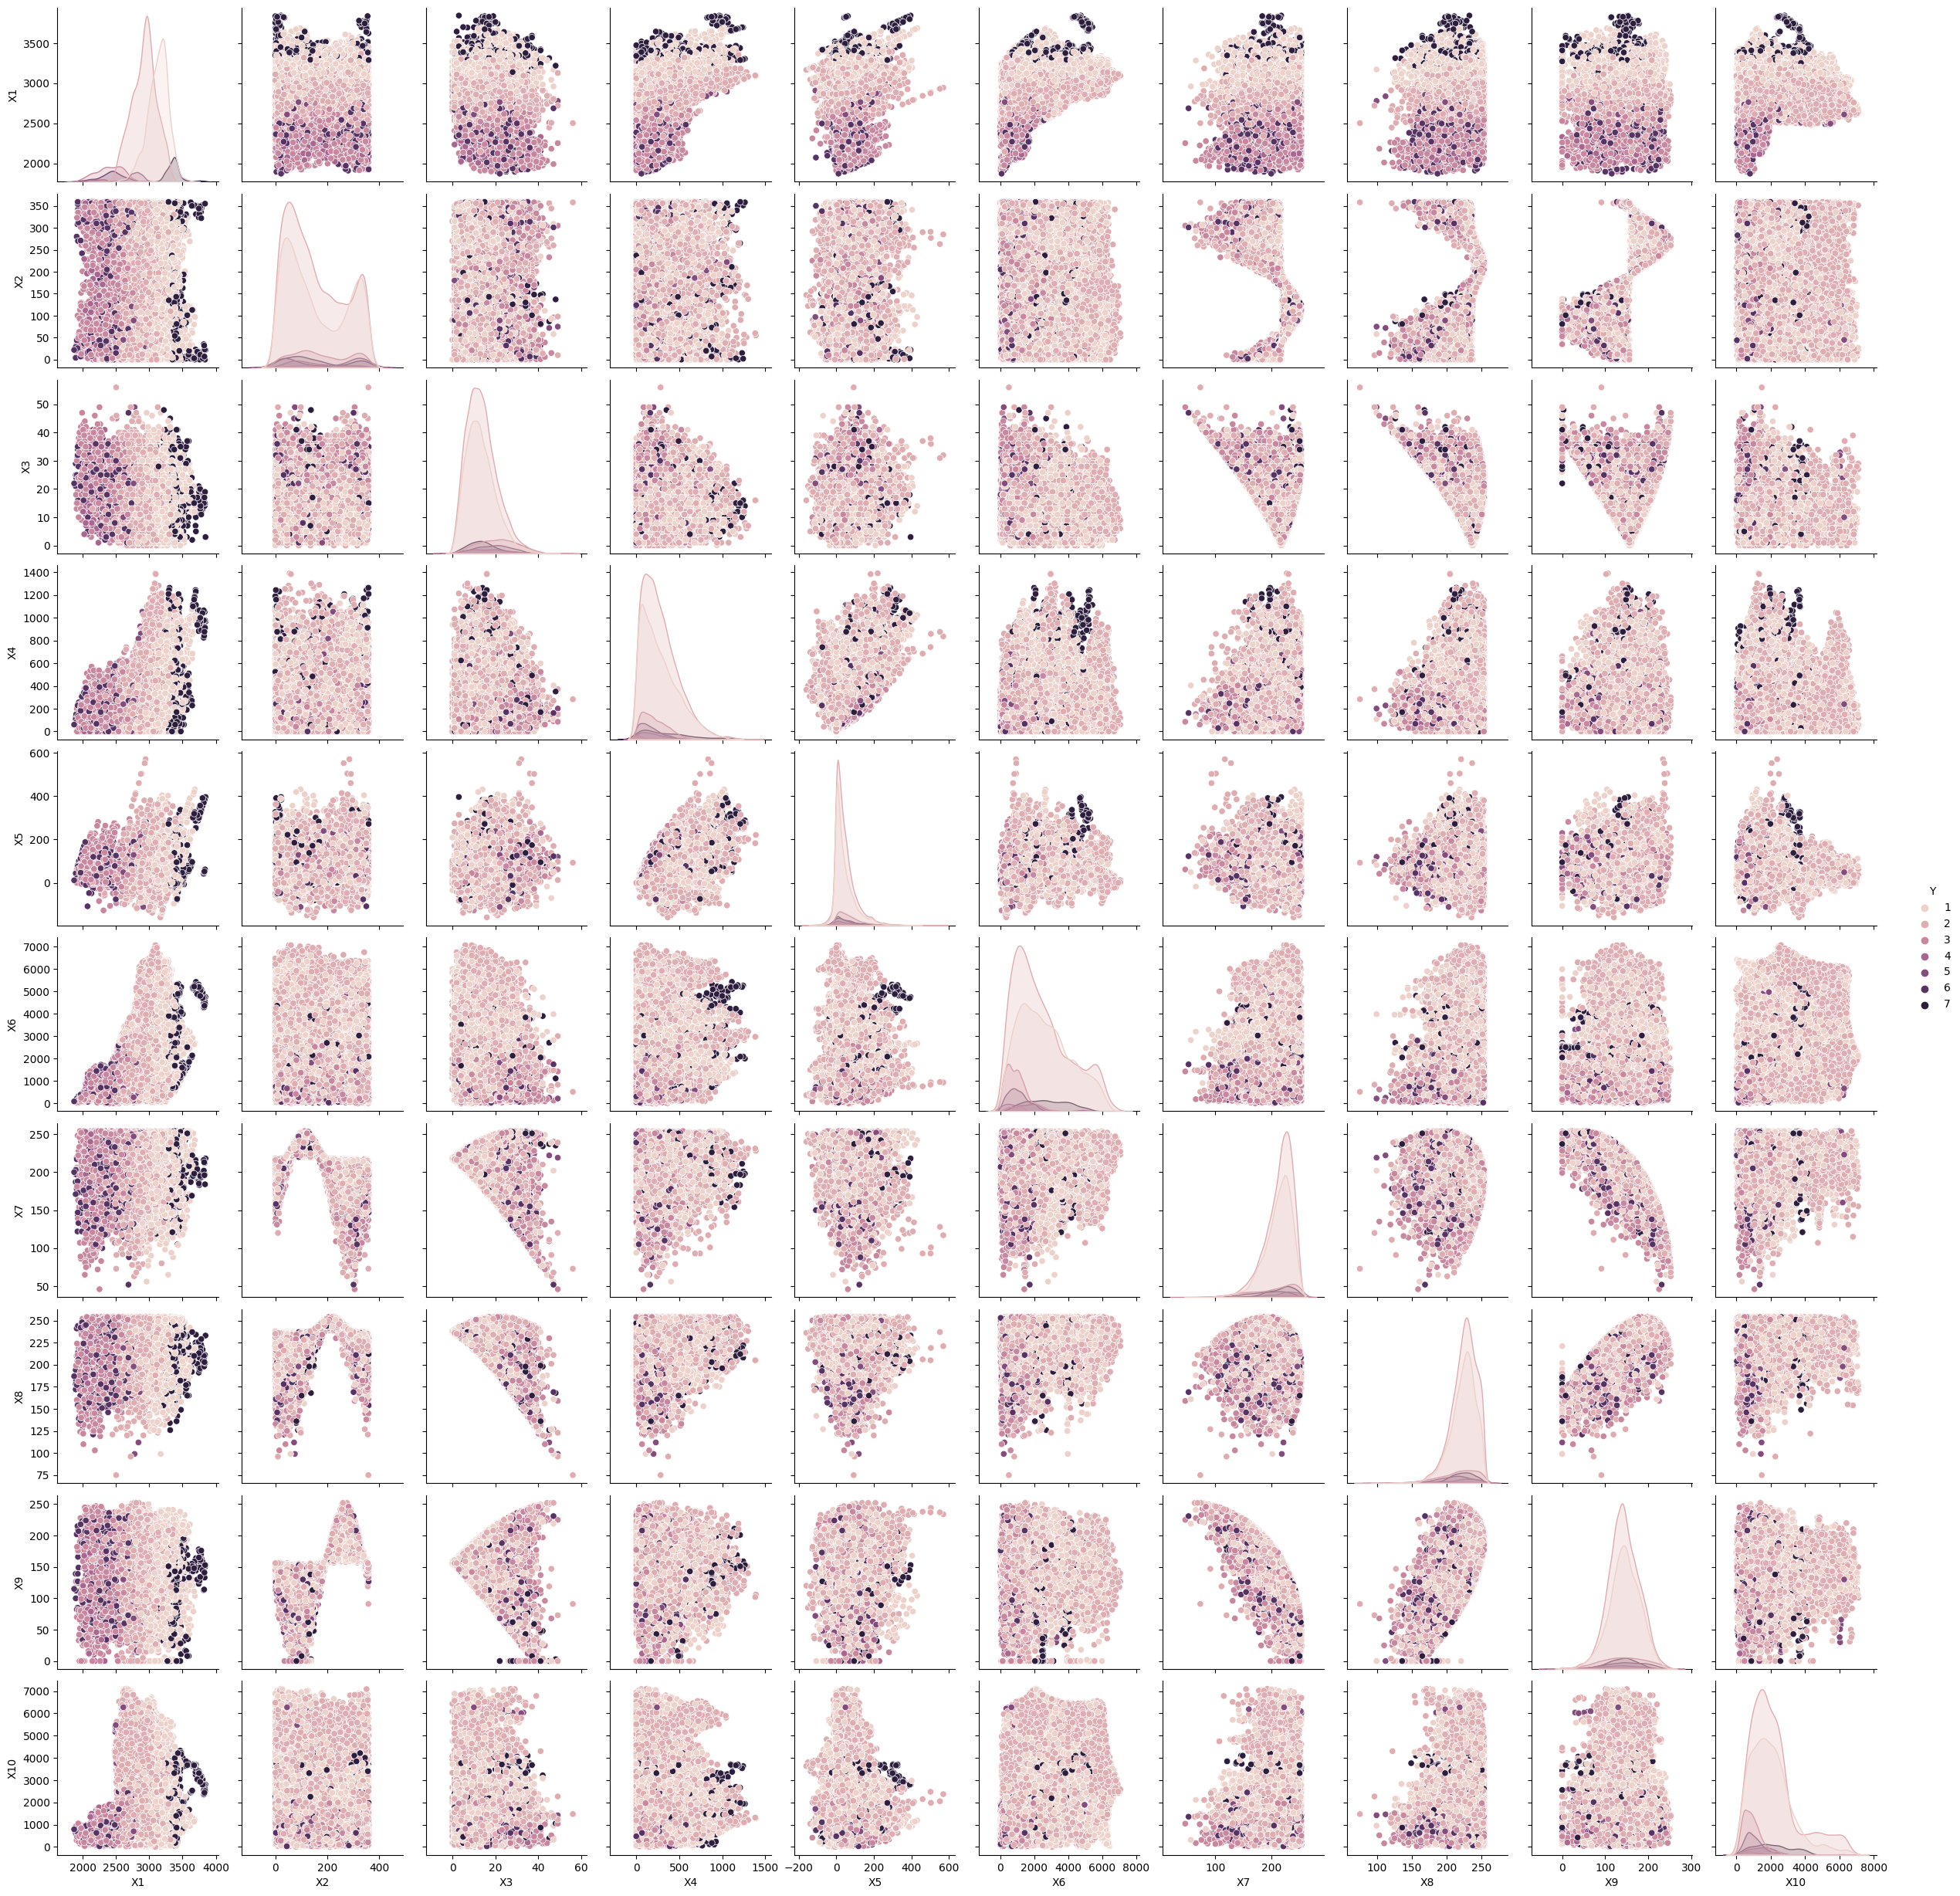

In [20]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='Y')

<Axes: >

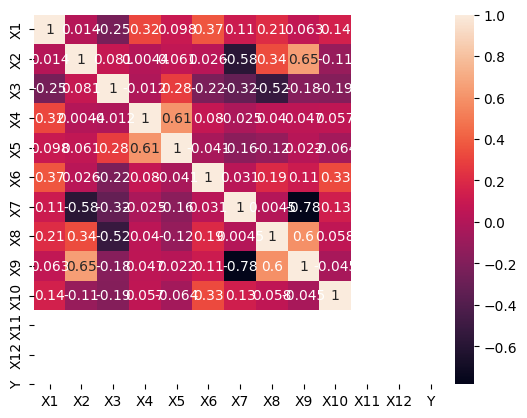

In [21]:
df_heat = X_train[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10"]]
sns.heatmap(df_heat.corr(), xticklabels=df.columns, yticklabels=df.columns, annot=True)

In [22]:
df.to_csv('data/train_clean.csv', index=False)